In [1]:
%load_ext autoreload
%autoreload 2

# Convolutional NN

In [2]:
import numpy as np
import gzip
import os
import pickle
from matplotlib import pyplot

from si.data import Dataset
from si.util import to_categorical, summary

Load the MNIST dataset

In [3]:
def load_mnist(sample_size=None):
    DIR = os.path.dirname(os.path.realpath('.'))
    filename = os.path.join(DIR, 'datasets/mnist.pkl.gz')
    f = gzip.open(filename, 'rb')
    data = pickle.load(f, encoding='bytes')
    (x_train, y_train), (x_test, y_test) = data
    if sample_size:
        return Dataset(x_train[:sample_size],y_train[:sample_size]),Dataset(x_test,y_test)
    else:
        return Dataset(x_train,y_train),Dataset(x_test,y_test)

In [4]:
train,test = load_mnist(500)

In [5]:
def preprocess(train):
    # reshape and normalize input data 
    train.X = train.X.reshape(train.X.shape[0], 28, 28, 1)
    train.X = train.X.astype('float32')
    train.X /= 255
    train.y = to_categorical(train.y)

In [6]:
preprocess(train)
preprocess(test)

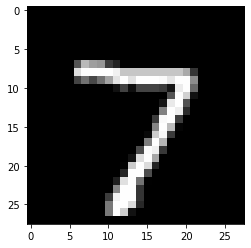

In [7]:
def plot_img(img,shape=(28,28)):
    pic = (img*255).reshape(shape)
    pic = pic.astype('int')
    pyplot.imshow(pic, cmap=pyplot.get_cmap('gray'))
    pyplot.show()

plot_img(test.X[0])

In [8]:
from si.supervised import NN, Dense, Activation, Conv2D, Flatten
from si.util.activation import sigmoid, tanh

Build the model

In [9]:
net = NN(epochs=2000,lr=0.1,verbose=False)
net.add(Conv2D((28, 28, 1), (3, 3), 1))
net.add(Activation(tanh))
net.add(Flatten())                     
net.add(Dense(26*26*1, 100))           
net.add(Activation(tanh))
net.add(Dense(100, 10))                
net.add(Activation(sigmoid))

Train the model

In [10]:
net.fit(train)

 epoch 1/2000 error = 0.40333956301380647
 epoch 2/2000 error = 0.4024677524179703
 epoch 3/2000 error = 0.42918592293663343
 epoch 4/2000 error = 0.43857772949192897
 epoch 5/2000 error = 0.4039178773862223
 epoch 6/2000 error = 0.375081658159803
 epoch 7/2000 error = 0.3592915872407597
 epoch 8/2000 error = 0.34683592435683647
 epoch 9/2000 error = 0.33529142989443905
 epoch 10/2000 error = 0.3239361172885405
 epoch 11/2000 error = 0.31303619667546323
 epoch 12/2000 error = 0.3027302414497323
 epoch 13/2000 error = 0.2932213619518032
 epoch 14/2000 error = 0.28490346055104393
 epoch 15/2000 error = 0.27858827359626803
 epoch 16/2000 error = 0.2762600250642925
 epoch 17/2000 error = 0.2840427847339481
 epoch 18/2000 error = 0.32255701806716974
 epoch 19/2000 error = 0.4240540257761958
 epoch 20/2000 error = 0.4555207181398909
 epoch 21/2000 error = 0.18676077041991895
 epoch 22/2000 error = 0.18219311704649221
 epoch 23/2000 error = 0.15426413378617512
 epoch 24/2000 error = 0.1331631

In [11]:
out = net.predict(test.X[0:3])
print("\n")
print("predicted values : ")
print(np.round(out), end="\n")
print("true values : ")
print(test.y[0:3])



predicted values : 
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
true values : 
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [12]:
conv = net.layers[0]

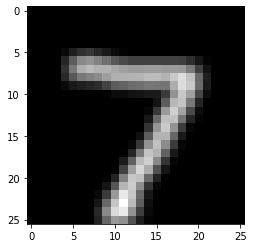

In [13]:
plot_img(conv.forward(test.X[:1]),shape=(26,26))